##  Calculo del ranking  de paises sudamericanos que participaron en las eliminatorias para el mundial Rusia 2018  usando el algoritmo PageRank.

## 1. Introducion:
#### PageRank es una marca registrada y patentada1  por Google el 9 de enero de 1999 que ampara una familia de algoritmos utilizados para asignar de forma numérica la relevancia de los documentos (o páginas web) indexados por un motor de búsqueda. El primer documento sobre el proyecto, que describe el PageRank y el prototipo inicial del motor de búsqueda de Google, se publicó en 1998. Sus propiedades son muy discutidas por los expertos en optimización de motores de búsqueda. El sistema PageRank es utilizado por el popular motor de búsqueda Google para ayudarle a determinar la importancia o relevancia de una página. Fue desarrollado por los fundadores de Google, Larry Page (apellido, del cual, recibe el nombre este algoritmo) y Sergey Brin, en la Universidad de Stanford mientras estudiaban el posgrado en ciencias de la computación.

#### PageRank confía en la naturaleza democrática de la web utilizando su vasta estructura de enlaces como un indicador del valor de una página en concreto. Google interpreta un enlace de una página A a una página B como un voto, de la página A, para la página B. Pero Google mira más allá del volumen de votos, o enlaces que una página recibe; también analiza la página que emite el voto. Los votos emitidos por las páginas consideradas "importantes", es decir con un PageRank elevado, valen más, y ayudan a hacer a otras páginas "importantes". Por lo tanto, el PageRank de una página refleja la importancia de la misma en Internet. 


## 2. Algoritmo:

### PageRank Algorithm   

#### Usaremos un caso particular 
#### Definimos nuestra matriz de adyacencia con los equipos sudamericanos
#### que participaron para las eliminatorias del Mundial Rusia 2018

#### Orden para cada País que participo en las eliminatorias

1.  Argentina	
2.  Bolivia	
3.  Brasil	
4.  Chile	
5.  Colombia	
6.  Ecuador	
7.  Paraguay	
8.  Perú	
9.  Uruguay	
10. Venezuela

#### Definimos nuestra matriz de adyacencia
#### A[i,j] = 3 si el país 'i' le gano al país 'j'
#### A[i,j] = 1 si el país 'i' empato con país 'j'
#### A[i,j] = 0 si el país 'i' perdió con el país 'j'


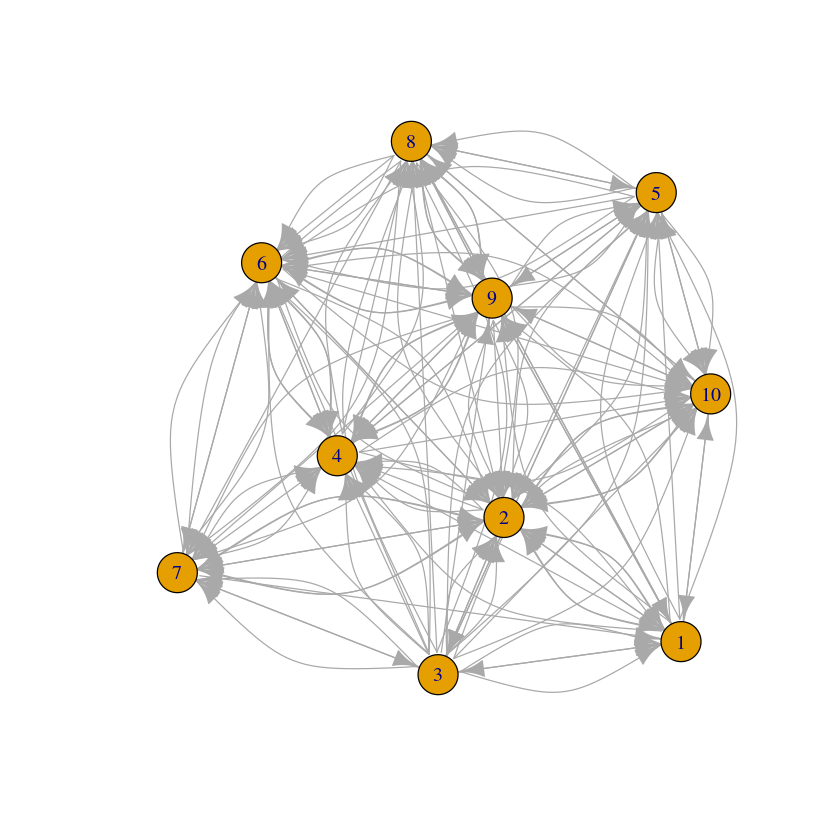

In [36]:
num_equipos <- 10
#Se implementa la matriz
A <- matrix(c(0, 3, 1 ,3, 3 ,0, 0, 1, 3, 1, 
              3, 0, 1, 3, 0, 1, 3, 0, 0, 3,
              3, 3, 0, 3, 3, 3, 3, 3, 1, 3, 
              0, 0, 0, 0, 1, 3, 0, 3, 3, 3, 
              0, 3, 1, 1, 0, 3, 0, 3, 1, 3, 
              0, 3, 0, 3, 0, 0, 1, 0, 3, 3,
              1, 3, 1, 3, 0, 3, 0, 0, 0, 0,
              1, 3, 0, 0, 1, 3, 3, 0, 3, 1, 
              1, 3, 0, 3, 3, 3, 3, 3, 0, 3, 
              1, 3, 0, 0, 1, 0, 0, 1, 1, 0),
            nrow = num_equipos,ncol = num_equipos,byrow = TRUE)

library(igraph)
plot(graph.adjacency(A))

#### Primero tenemos que crear una nueva matrix A1 que resultara de
#### dividir cada columna de la matriz A entre la suma de cada columna

In [18]:
A1 <- matrix(nrow = num_equipos,ncol= num_equipos)
for( i in 1:num_equipos){
  sum_columna <- sum(A[,i])
  A1[,i] = A[,i]/sum_columna
}
A1


0.0,0.125,0.25,0.15789474,0.25000000,0.00000000,0.00000000,0.07142857,0.20000000,0.05
0.3,0.000,0.25,0.15789474,0.00000000,0.05263158,0.23076923,0.00000000,0.00000000,0.15
0.3,0.125,0.00,0.15789474,0.25000000,0.15789474,0.23076923,0.21428571,0.06666667,0.15
0.0,0.000,0.00,0.00000000,0.08333333,0.15789474,0.00000000,0.21428571,0.20000000,0.15
0.0,0.125,0.25,0.05263158,0.00000000,0.15789474,0.00000000,0.21428571,0.06666667,0.15
0.0,0.125,0.00,0.15789474,0.00000000,0.00000000,0.07692308,0.00000000,0.20000000,0.15
0.1,0.125,0.25,0.15789474,0.00000000,0.15789474,0.00000000,0.00000000,0.00000000,0.00
0.1,0.125,0.00,0.00000000,0.08333333,0.15789474,0.23076923,0.00000000,0.20000000,0.05
0.1,0.125,0.00,0.15789474,0.25000000,0.15789474,0.23076923,0.21428571,0.00000000,0.15
0.1,0.125,0.00,0.00000000,0.08333333,0.00000000,0.00000000,0.07142857,0.06666667,0.00


##### El siguiente paso es encontra un vector pagerank_equipos de tamaño 10 que represente el PageRank de cada equipo
#### Y como es ese vector pues es el vector propio del maximo valor propio
#### Imprimimos el maximo valor proximo

In [41]:
vector_ValoresPropios <- c(eigen(A1)$values)
vector_VectoresPropios <- matrix(eigen(A1)$vectors,nrow = 10, ncol = 10)



#### Ahora calculamos cual es el maximo valor propio.

In [28]:
maxVP <- -Inf
for(i in 1:10){
  if(maxVP < Mod(vector_ValoresPropios[i])){
    maxVP <- Mod(vector_ValoresPropios[i])
    index <- i
  } 
}



#### Imprimimos el maximo valor propio

In [24]:
print(maxVP)

[1] 1


#### Imprimimos el vector propio relacionado a ese vector

In [25]:
pagerank_equipos <- Mod(vector_VectoresPropios[,index])
print(pagerank_equipos)

 [1] 0.3793522 0.3616417 0.4738853 0.2163052 0.3153363 0.1977172 0.2669837
 [8] 0.2846076 0.3731390 0.1546235


#### Ahora ya tenemos el pagerank de cada uno